# Analiza oglasov za delo

Za projektno nalogo bom analizirala oglase za delo, ki so bili objavljeni na spletni strani [e-Študentski Servis](https://www.studentski-servis.com/studenti/prosta-dela).

In [1]:
import pandas as pd

In [2]:
oglasi = pd.read_csv(r"C:\Users\Mia\Documents\FAKS\projektna-naloga-UVP\obdelani-podatki\oglasi.csv", index_col="sifra")

In [3]:
oglasi

,vrsta_dela,lokacija,neto_placilo,trajanje,delovnik,prosta_mesta
sifra,,,,,,
288776,TRENER/KA,HRUŠICA,8.4,DLJE ČASA (OBČASNO),PO DOGOVORU,NaN
304105,DELO NA TERENU,POSAVJE,6.0,PO DOGOVORU,PO DOGOVORU,NaN
309918,DELO NA TERENU,"RIBNICA, KOČEVJE",6.0,PO DOGOVORU,PO DOGOVORU,NaN
309919,DELO NA TERENU,"ČRNOMELJ, METLIKA",6.0,PO DOGOVORU,PO DOGOVORU,NaN
317382,STREŽBA,CERKLJE NA GORENJSKEM,7.0,DLJE ČASA (ZAČ. IN OBČ. DELO),MED VIKENDI,2.0
...,...,...,...,...,...,...
385366,POMOČ V KUHINJI,SORICA,7.0,PO DOGOVORU,PO DOGOVORU,NaN
385367,KLICNI CENTER,LJUBLJANA ŠIŠKA,6.7,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,2.0
385371,POMOČ PRI PRODAJI,LJUBLJANA - BTC,6.0,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,NaN


Oglasi so razvrščeni kronološko, kot so jih objavljali na spletno stran. Poglejmo si razvrstitev po padajoči urni postavki.

In [4]:
padajoce_placilo = oglasi.sort_values("neto_placilo", ascending=False)

In [5]:
padajoce_placilo

,vrsta_dela,lokacija,neto_placilo,trajanje,delovnik,prosta_mesta
sifra,,,,,,
385238,POUČEVANJE,DOMŽALE,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),POPOLDAN,2.0
380941,POUČEVANJE,ŽALEC,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
334621,POUČEVANJE,ŠKOFJA LOKA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,NaN
378800,POUČEVANJE,LJUBLJANA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
334622,POUČEVANJE,ŠKOFJA LOKA,10.1,PO DOGOVORU,PO DOGOVORU,NaN
...,...,...,...,...,...,...
383980,INVENTURA,CELJE,5.2,"TOREK, 8. 11. 2022",DOPOLDAN,20.0
384967,POMOČ PRI PRODAJI,CELJE,5.2,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,3.0
384510,ADMINISTRATIVNA DELA,LJUBLJANA,5.2,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN


Poglejmo, katera dela so najbolje plačana.

In [6]:
padajoce_placilo.head(15)

,vrsta_dela,lokacija,neto_placilo,trajanje,delovnik,prosta_mesta
sifra,,,,,,
385238,POUČEVANJE,DOMŽALE,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),POPOLDAN,2.0
380941,POUČEVANJE,ŽALEC,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
334621,POUČEVANJE,ŠKOFJA LOKA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,NaN
378800,POUČEVANJE,LJUBLJANA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
334622,POUČEVANJE,ŠKOFJA LOKA,10.1,PO DOGOVORU,PO DOGOVORU,NaN
379678,TRENER/KA,LJUBLJANA - DRAVLJE,10.1,PO DOGOVORU,POPOLDAN,2.0
381773,POUČEVANJE,KRANJ,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,NaN
362422,PROGRAMIRANJE,LJUBLJANA,10.0,PO DOGOVORU,PO DOGOVORU,2.0
385246,TEŽJA FIZIČNA DELA,MARIBOR,10.0,2. IN 3. 11. 2022,DOPOLDAN,2.0


Opazimo, da se med najbolje plačanimi deli največkrat pojavi poučevanje.

In [7]:
oglasi.groupby("lokacija").size().sort_values()

lokacija
LJUBLJANA IN LETALIŠČE BRNIK      1
VIDEM - DOBREPOLJE                1
MAREZIGE                          1
VIDEM DOBREPOLJE                  1
MALA NEDELJA                      1
                               ... 
LJUBLJANA BTC                    60
KRANJ                            77
CELJE                            82
MARIBOR                         140
LJUBLJANA                       649
Length: 635, dtype: int64

Kot pričakovano, je največ ponudb za delo v največjih krajih v Sloveniji - Ljubljani, Mariboru, Celju in Kranju.

Poglejmo, ali je število ponudb za delo povezano z urno postavko.

<AxesSubplot: xlabel='neto_placilo'>

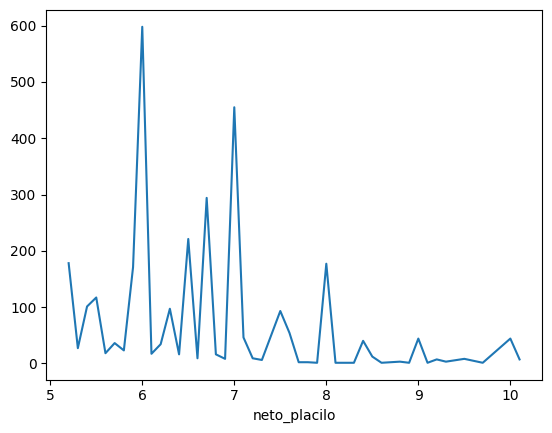

In [8]:
oglasi.groupby("neto_placilo").size().plot()

In [9]:
oglasi.groupby("lokacija").neto_placilo.mean()

lokacija
AJDOVŠČINA                    7.150000
AJDOVŠČINA ALI NOVA GORICA    6.700000
ANKARAN                       6.766667
BEGUNJE NA GORENJSKEM         7.700000
BELTINCI                      8.000000
                                ...   
ŽETALE ALI NA DALJAVO         8.400000
ŽIRI                          6.160000
ŽIROVNICA                     7.000000
ŽIROVNICA Z OKOLICO           7.000000
ŽUŽEMBERK                     8.000000
Name: neto_placilo, Length: 635, dtype: float64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [11]:
oglasi.neto_placilo > 10

sifra
288776    False
304105    False
309918    False
309919    False
317382    False
          ...  
385366    False
385367    False
385371    False
385372    False
385373    False
Name: neto_placilo, Length: 3000, dtype: bool

In [12]:
oglasi[oglasi.neto_placilo > 10]

,vrsta_dela,lokacija,neto_placilo,trajanje,delovnik,prosta_mesta
sifra,,,,,,
334621,POUČEVANJE,ŠKOFJA LOKA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,NaN
334622,POUČEVANJE,ŠKOFJA LOKA,10.1,PO DOGOVORU,PO DOGOVORU,NaN
378800,POUČEVANJE,LJUBLJANA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
379678,TRENER/KA,LJUBLJANA - DRAVLJE,10.1,PO DOGOVORU,POPOLDAN,2.0
380941,POUČEVANJE,ŽALEC,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
381773,POUČEVANJE,KRANJ,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,NaN
385238,POUČEVANJE,DOMŽALE,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),POPOLDAN,2.0


In [13]:
oglasi.prosta_mesta / oglasi.neto_placilo

sifra
288776         NaN
304105         NaN
309918         NaN
309919         NaN
317382    0.285714
            ...   
385366         NaN
385367    0.298507
385371         NaN
385372         NaN
385373    0.877193
Length: 3000, dtype: float64

In [17]:
oglasi.groupby("lokacija").neto_placilo.mean()

lokacija
AJDOVŠČINA                    7.150000
AJDOVŠČINA ALI NOVA GORICA    6.700000
ANKARAN                       6.766667
BEGUNJE NA GORENJSKEM         7.700000
BELTINCI                      8.000000
                                ...   
ŽETALE ALI NA DALJAVO         8.400000
ŽIRI                          6.160000
ŽIROVNICA                     7.000000
ŽIROVNICA Z OKOLICO           7.000000
ŽUŽEMBERK                     8.000000
Name: neto_placilo, Length: 635, dtype: float64

In [18]:
oglasi.groupby("lokacija").mean(numeric_only=True)

,neto_placilo,prosta_mesta
lokacija,,
AJDOVŠČINA,7.150000,2.500000
AJDOVŠČINA ALI NOVA GORICA,6.700000,2.000000
ANKARAN,6.766667,2.333333
BEGUNJE NA GORENJSKEM,7.700000,2.000000
BELTINCI,8.000000,NaN
...,...,...
ŽETALE ALI NA DALJAVO,8.400000,NaN
ŽIRI,6.160000,2.000000
ŽIROVNICA,7.000000,NaN


<AxesSubplot: xlabel='neto_placilo'>

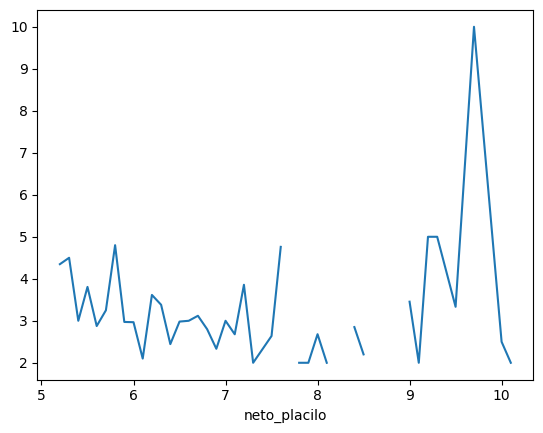

In [19]:
oglasi.groupby("neto_placilo").prosta_mesta.mean().plot()

<AxesSubplot: xlabel='neto_placilo'>

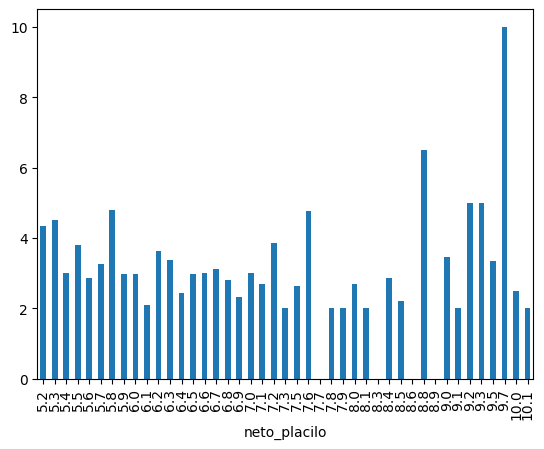

In [20]:
oglasi.groupby("neto_placilo").prosta_mesta.mean().plot.bar()

<AxesSubplot: xlabel='sifra'>

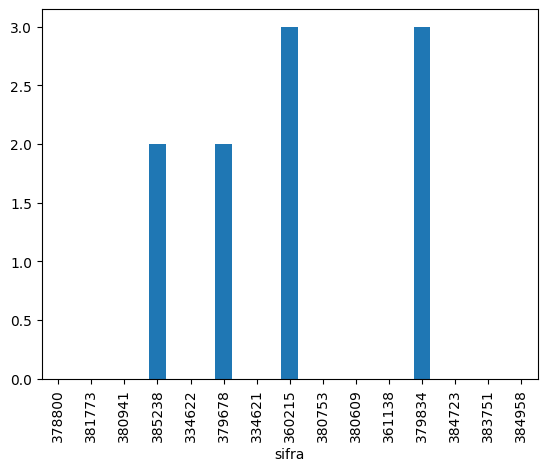

In [21]:
oglasi[
    oglasi.neto_placilo > 7
    ].sort_values(
        "neto_placilo", ascending=False
    ).head(
            15
    ).prosta_mesta.plot.bar()

<AxesSubplot: xlabel='neto_placilo', ylabel='prosta_mesta'>

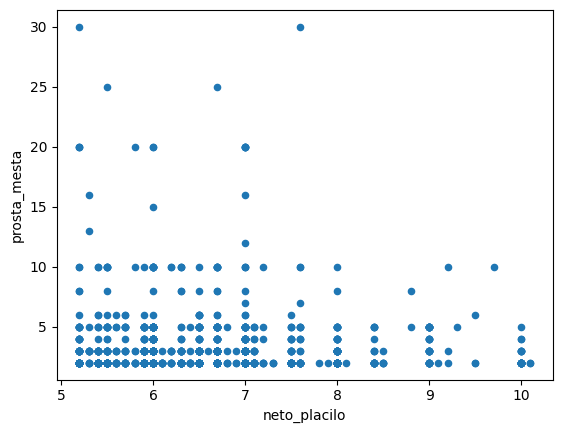

In [23]:
oglasi.plot.scatter(x="neto_placilo", y="prosta_mesta")